# Import the Dataset

For this data analysis, I'm using the connect-4 dataset from https://www.openml.org/search?type=data&sort=runs&id=40668&status=active or https://api.openml.org/d/40668.

Its ID is 40668.

In [1]:
import openml
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

dataset = openml.datasets.get_dataset(40668)
X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute)
# Convert pandas → Polars and coerce values (e.g., "0"/"1"/"2") to ints
X_pl = pl.from_pandas(X).with_columns(pl.all().cast(pl.Int8, strict=False))
y_pl = pl.Series("class", pd.Series(y)).cast(pl.Int8, strict=False)

# Inspect the Data

## Display the first few rows using .head() to get a quick overview.

In [2]:
X_pl.head()

a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
X_pl.shape, y_pl.shape

((67557, 42), (67557,))

Number of instances: 67557
Number of features: 42
Number of classes: 3
Number of numerical features: 0
Number of categorical features: 42

Class distribution:
class
2    44473
1    16635
0     6449
Name: count, dtype: int64


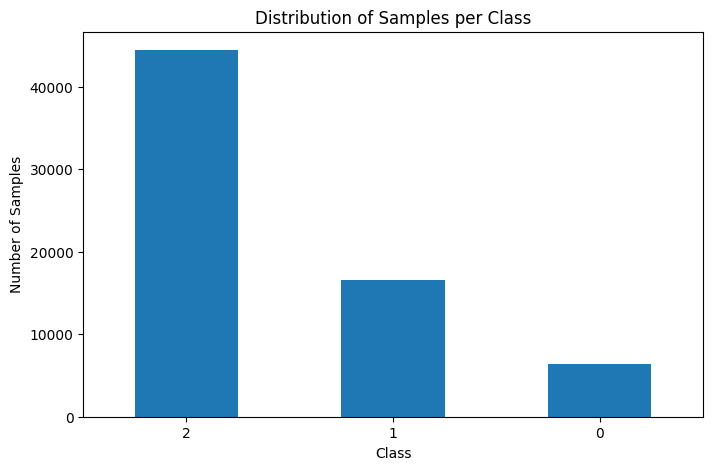

In [4]:
# Calculate basic dataset properties
num_instances = X.shape[0]
num_features = X.shape[1]
num_classes = y.nunique() if hasattr(y, 'nunique') else len(np.unique(y))

# Convert the categorical_indicator to a NumPy array for easier manipulation
categorical_array = np.array(categorical_indicator)
num_categorical_features = categorical_array.sum()  # True values indicate categorical features
num_numerical_features = len(categorical_array) - num_categorical_features

print("Number of instances:", num_instances)
print("Number of features:", num_features)
print("Number of classes:", num_classes)
print("Number of numerical features:", num_numerical_features)
print("Number of categorical features:", num_categorical_features)

# Get the distribution of samples per class
class_distribution = y.value_counts()
print("\nClass distribution:")
print(class_distribution)

# Plot the distribution of samples per class
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples per Class")
plt.xticks(rotation=0) 
plt.show()

As we can see, the dataset is not balanced since the number of samples in each class is not roughly the same.

## Use (Polars equivalent of) .info() and .describe() to understand data types and summary statistics.

In [5]:
# Info / schema
print("Schema (name: dtype):")
for name, dtype in X_pl.schema.items():
    print(name, ":", dtype)

Schema (name: dtype):
a1 : Int8
a2 : Int8
a3 : Int8
a4 : Int8
a5 : Int8
a6 : Int8
b1 : Int8
b2 : Int8
b3 : Int8
b4 : Int8
b5 : Int8
b6 : Int8
c1 : Int8
c2 : Int8
c3 : Int8
c4 : Int8
c5 : Int8
c6 : Int8
d1 : Int8
d2 : Int8
d3 : Int8
d4 : Int8
d5 : Int8
d6 : Int8
e1 : Int8
e2 : Int8
e3 : Int8
e4 : Int8
e5 : Int8
e6 : Int8
f1 : Int8
f2 : Int8
f3 : Int8
f4 : Int8
f5 : Int8
f6 : Int8
g1 : Int8
g2 : Int8
g3 : Int8
g4 : Int8
g5 : Int8
g6 : Int8


In [6]:
print("Feature Summary (X_pl.describe()):")
print(X_pl.describe())

print("\nTarget Summary (y_pl.describe()):")
print(y_pl.describe())

Feature Summary (X_pl.describe()):
shape: (9, 43)
┌────────────┬──────────┬──────────┬──────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ a1       ┆ a2       ┆ a3       ┆ … ┆ g3       ┆ g4       ┆ g5       ┆ g6       │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪══════════╪══════════╪══════════╪═══╪══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 67557.0  ┆ 67557.0  ┆ 67557.0  ┆ … ┆ 67557.0  ┆ 67557.0  ┆ 67557.0  ┆ 67557.0  │
│ null_count ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ mean       ┆ 0.959575 ┆ 0.53762  ┆ 0.269002 ┆ … ┆ 0.191394 ┆ 0.069971 ┆ 0.017185 ┆ 0.001628 │
│ std        ┆ 0.835185 ┆ 0.779892 ┆ 0.610544 ┆ … ┆ 0.52948  ┆ 0.329583 ┆ 0.161822 ┆ 0.04646  │
│ min        ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0

## Check for missing values and duplicates

In [7]:
print("Missing values per feature: ")
print(X_pl.null_count())

Missing values per feature: 
shape: (1, 42)
┌─────┬─────┬─────┬─────┬───┬─────┬─────┬─────┬─────┐
│ a1  ┆ a2  ┆ a3  ┆ a4  ┆ … ┆ g3  ┆ g4  ┆ g5  ┆ g6  │
│ --- ┆ --- ┆ --- ┆ --- ┆   ┆ --- ┆ --- ┆ --- ┆ --- │
│ u32 ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32 ┆ u32 ┆ u32 ┆ u32 │
╞═════╪═════╪═════╪═════╪═══╪═════╪═════╪═════╪═════╡
│ 0   ┆ 0   ┆ 0   ┆ 0   ┆ … ┆ 0   ┆ 0   ┆ 0   ┆ 0   │
└─────┴─────┴─────┴─────┴───┴─────┴─────┴─────┴─────┘


In [8]:
# Count duplicate rows in X (Polars: boolean mask via .is_duplicated())
num_dupes = X_pl.is_duplicated().sum()
print("\nNumber of duplicate rows in features:", int(num_dupes))


Number of duplicate rows in features: 0


# Basic Filtering and Grouping

## Apply filters to extract meaningful subsets of the data.

In [9]:
# Filtering: center taken by Player 1 (d3 == 1 and d4 == 1)

center_p1_expr = (pl.col("d3") == 1) & (pl.col("d4") == 1)

# Materialize the expression as a boolean Series with the same row order as X_pl
mask = X_pl.select(center_p1_expr.alias("mask")).to_series()

# 3) Filter X and y with that mask
X_center_p1_pl = X_pl.filter(mask)
X_not_center_p1_pl = X_pl.filter(~mask)

y_center_p1_pl = y_pl.filter(mask)
y_not_center_p1_pl = y_pl.filter(~mask)

print(f"Rows where center is taken by Player 1 (d3=1 & d4=1): {X_center_p1_pl.height} / {X_pl.height}")
print(f"Rows where center is NOT taken by Player 1: {X_not_center_p1_pl.height} / {X_pl.height}")

Rows where center is taken by Player 1 (d3=1 & d4=1): 749 / 67557
Rows where center is NOT taken by Player 1: 66808 / 67557


## Use groupby() or equivalent on a selected variable and compute summary statistics (e.g., mean, count).

In [10]:
# Helper: counts + proportions as a Polars DataFrame
def outcome_counts_and_props_pl(y_series: pl.Series) -> pl.DataFrame:
    df = y_series.to_frame("class")
    counts = (df
              .group_by("class")
              .agg(count=pl.len())
              .sort("class"))
    total = counts["count"].sum()
    return counts.with_columns(
        (pl.col("count") / total).alias("proportion")
    )

print("\n=== Outcome distribution | center taken by P1 (d3=1 & d4=1) ===")
dist_center_p1_pl = outcome_counts_and_props_pl(y_center_p1_pl)
print(dist_center_p1_pl)

print("\n=== Outcome distribution | center NOT taken by P1 ===")
dist_not_center_p1_pl = outcome_counts_and_props_pl(y_not_center_p1_pl)
print(dist_not_center_p1_pl)


=== Outcome distribution | center taken by P1 (d3=1 & d4=1) ===
shape: (3, 3)
┌───────┬───────┬────────────┐
│ class ┆ count ┆ proportion │
│ ---   ┆ ---   ┆ ---        │
│ i8    ┆ u32   ┆ f64        │
╞═══════╪═══════╪════════════╡
│ 0     ┆ 142   ┆ 0.189586   │
│ 1     ┆ 1     ┆ 0.001335   │
│ 2     ┆ 606   ┆ 0.809079   │
└───────┴───────┴────────────┘

=== Outcome distribution | center NOT taken by P1 ===
shape: (3, 3)
┌───────┬───────┬────────────┐
│ class ┆ count ┆ proportion │
│ ---   ┆ ---   ┆ ---        │
│ i8    ┆ u32   ┆ f64        │
╞═══════╪═══════╪════════════╡
│ 0     ┆ 44331 ┆ 0.663558   │
│ 1     ┆ 6448  ┆ 0.096515   │
│ 2     ┆ 16029 ┆ 0.239926   │
└───────┴───────┴────────────┘


# Explore a Machine Learning Algorithm
Choose an ML algorithm.
Begin experimenting with model inputs and outputs.

In [11]:
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Convert back to pandas just for modeling
X_pd = X_pl.to_pandas()
y_pd = y_pl.to_pandas()

# Then continue with the existing sklearn code using X_pd / y_pd:

# Split the dataset into 80% training and 20% test sets.
# stratify=y is used to maintain the class distribution in both sets.
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=3959, stratify=y)

# Define percentages for subsampling (from 10% to 100% of the training set)
percentages = np.arange(0.1, 1.1, 0.1)

# List to collect results for each subset and each model
results = []

for p in percentages:
    subset_size = int(len(X_train) * p)
    # Randomly sample a subset of the training data. Using a fixed random_state for reproducibility.
    X_train_subset = X_train.sample(n=subset_size, random_state=3959)
    y_train_subset = y_train.loc[X_train_subset.index]
    
    # Train Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=3959)
    start_time = time.time()
    dt.fit(X_train_subset, y_train_subset)
    dt_train_time = time.time() - start_time
    dt_accuracy = accuracy_score(y_test, dt.predict(X_test))
    
    # Train Gradient Boosting Classifier
    gb = GradientBoostingClassifier(random_state=3959)
    start_time = time.time()
    gb.fit(X_train_subset, y_train_subset)
    gb_train_time = time.time() - start_time
    gb_accuracy = accuracy_score(y_test, gb.predict(X_test))
    
    results.append({
        "Subset Size (%)": int(p * 100),
        "Decision Tree Accuracy": dt_accuracy,
        "Decision Tree Training Time (s)": dt_train_time,
        "Gradient Boosting Accuracy": gb_accuracy,
        "Gradient Boosting Training Time (s)": gb_train_time
    })

In [12]:
# Create a DataFrame to display the results in a table
results_df = pd.DataFrame(results)
results_df

,Subset Size (%),Decision Tree Accuracy,Decision Tree Training Time (s),Gradient Boosting Accuracy,Gradient Boosting Training Time (s)
0,10,0.649349,0.025866,0.747114,1.941537
1,20,0.674216,0.048888,0.747928,3.543473
2,30,0.687167,0.073528,0.752812,5.346031
3,40,0.693458,0.097341,0.752294,7.086827
4,50,0.704411,0.120621,0.751332,8.528563
5,60,0.714772,0.143733,0.751702,10.239907
6,70,0.716992,0.170321,0.753256,12.606748
7,80,0.724023,0.198476,0.753478,13.897634
8,90,0.726317,0.224196,0.752886,15.780378
9,100,0.732460,0.241733,0.753922,17.470838


# Visualization
Create one plot (e.g., histogram, boxplot, scatter plot) using Matplotlib, Seaborn, or others. 

I've already created 2 plots above. I'll plot 3 more here.

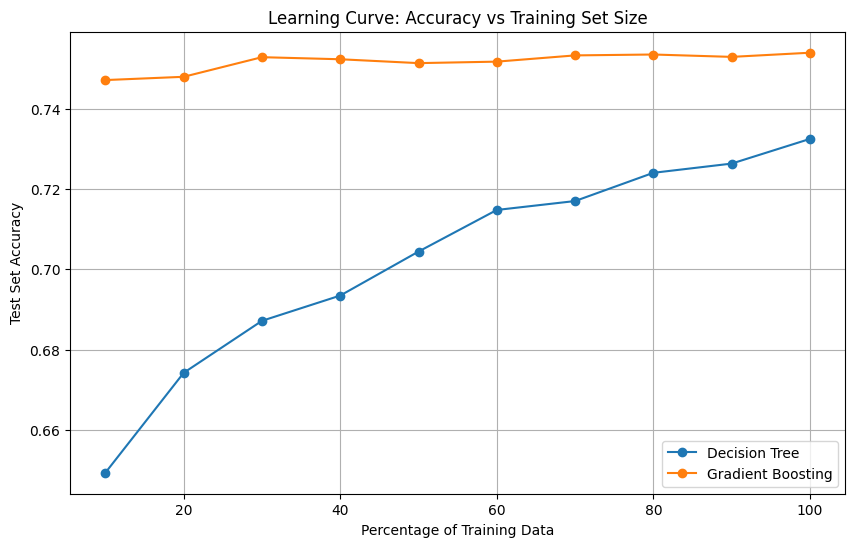

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(results_df["Subset Size (%)"], results_df["Decision Tree Accuracy"], marker='o', label="Decision Tree")
plt.plot(results_df["Subset Size (%)"], results_df["Gradient Boosting Accuracy"], marker='o', label="Gradient Boosting")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Test Set Accuracy")
plt.title("Learning Curve: Accuracy vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()

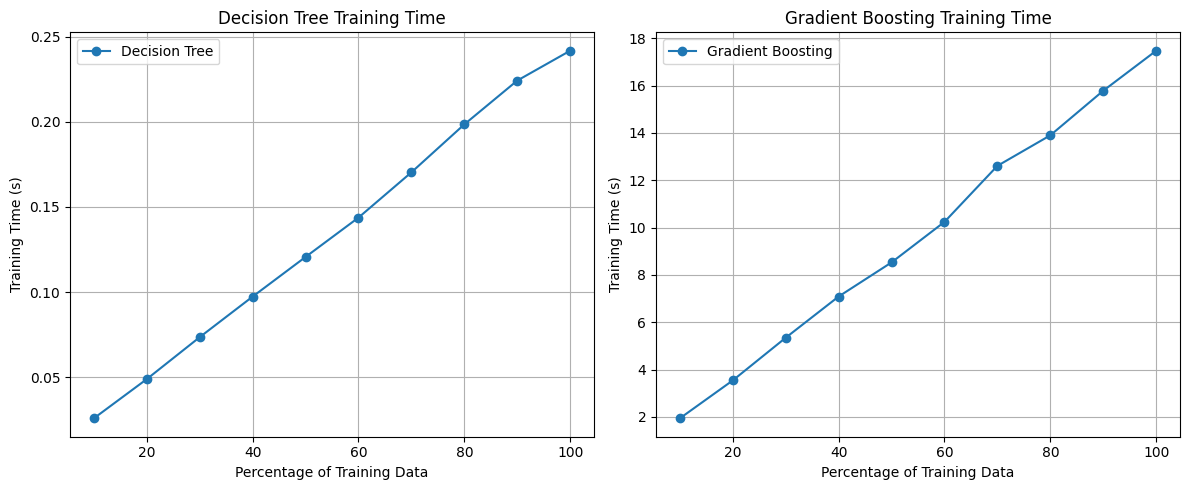

In [14]:
plt.figure(figsize=(12, 5))

# Plot for Decision Tree training time
plt.subplot(1, 2, 1)
plt.plot(results_df["Subset Size (%)"], results_df["Decision Tree Training Time (s)"], marker='o', label="Decision Tree")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Training Time (s)")
plt.title("Decision Tree Training Time")
plt.grid(True)
plt.legend()

# Plot for Gradient Boosting training time
plt.subplot(1, 2, 2)
plt.plot(results_df["Subset Size (%)"], results_df["Gradient Boosting Training Time (s)"], marker='o', label="Gradient Boosting")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Training Time (s)")
plt.title("Gradient Boosting Training Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Summary

When we look at the accuracy, as we increase the percentage of training data, gradient descent has approximately the same accuracy. Percentage of training data does not affect the accuracy of gradient descent. In contrast, as we increase the percentage of training data, the accuracy of decision tree increases approximately linearly with the percentage of training data. The accuracy of decision tree is positively related to the percentage of training data. 

On the other hand, gradient boosting always has a higher accuracy than decision tree, even though decision tree increases with the percentage of training data. Its lowest accuracy is higher than the highest accuracy of decision tree.

When we look at the training time, as we increase the percentage of training data, the training time of both decision tree and gradient boosting increases approximately linearly. 

On the other hand, gradient descent only increased from 0.05 seconds to 0.30 seconds, whereas gradient boosting increased from 2 seconds to 10 seconds. Even though they have remained the same increasing pattern, gradient boosting is much slower than gradient descent throughout the whole time. Decision tree has a shorter training time.